# AtliQ Hardware - Financial Analysis:

## Purpose

To unlock financial insights that were previously hidden from the sales team, providing crucial decision support and enhancing our overall financial strategy.

## Stackholders

* AtliQ Hardware: AtliQ Hardware is the primary client and the company for which the financial analysis is being conducted. They are interested in understanding their revenue, profits, and market trends to make informed business decisions.

* PWC (TripleTen World Consultancy): PWC is the consulting agency responsible for conducting the financial analysis and audit on behalf of AtliQ Hardware. They are responsible for delivering valuable insights and recommendations to their client.

* Sales Team: The sales team at AtliQ Hardware may benefit from the financial analysis as it can provide insights into market shifts, profitability by category, and other data that can inform their sales strategies.

* Company Executives: The top executives at AtliQ Hardware, including the CEO and CFO, are interested in the financial analysis results to make strategic decisions and allocate resources effectively.

* Shareholders/Investors: If AtliQ Hardware is a publicly traded company, shareholders and investors have a stake in the company's financial performance. They may be interested in the analysis to assess the company's financial health.

* Customers (e.g., Amazon, Best Buy, Walmart): Large customers like Amazon, Best Buy, and Walmart are interested in understanding the financial stability and performance of their suppliers, such as AtliQ Hardware, to ensure a reliable and consistent supply of products.

* Regulatory Authorities: Depending on the regions in which AtliQ Hardware operates, regulatory authorities may require certain financial disclosures and reports. Compliance with these regulations is essential.



## Project Composition

## Data Retrieval and Preprocessing:

In [1]:
#load libraries
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from scipy.stats import f_oneway
import statsmodels.api as sm

In [2]:
### connect to the database
import sqlite3
con = sqlite3.connect('atliq_db.sqlite3')

### check all tables in the database
cursor = con.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(cursor.fetchall())


[('dim_customer',), ('dim_product',), ('fact_pre_discount',), ('fact_manufacturing_cost',), ('fact_gross_price',), ('fact_sales_monthly',)]


In [3]:

# Define SQL queries to extract data from each table
customer_query = "SELECT * FROM dim_customer"
products_query = "SELECT * FROM dim_product"
pre_discount_query = "SELECT * FROM fact_pre_discount"
manufacturing_cost_query = "SELECT * FROM fact_manufacturing_cost"
gross_price_query = "SELECT * FROM fact_gross_price"
fact_sales_query =  "SELECT * FROM fact_sales_monthly"

# Use Pandas to read data from SQL queries into DataFrames
customer_data = pd.read_sql_query(customer_query, con)
products_data = pd.read_sql_query(products_query, con)
pre_discount_data = pd.read_sql_query(pre_discount_query, con)
manufacturing_cost_data = pd.read_sql_query(manufacturing_cost_query, con)
gross_price_data = pd.read_sql_query(gross_price_query, con)
fact_sales_data = pd.read_sql_query(fact_sales_query,con)

### Check for missing values, duplicates, and make changes to appropriate data types

In [4]:
#start with customer_data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_code  209 non-null    int64 
 1   customer       209 non-null    object
 2   platform       209 non-null    object
 3   channel        209 non-null    object
 4   market         209 non-null    object
 5   sub_zone       209 non-null    object
 6   region         209 non-null    object
dtypes: int64(1), object(6)
memory usage: 11.6+ KB


In [5]:
#convert into suitable data types
customer_data = customer_data.astype({
    'customer_code': int,
    'customer': str,
    'platform': str,
    'channel': str,
    'market': str,
    'sub_zone': str,
    'region': str

    # Assuming variant is a categorical variable
})

In [6]:
customer_data.isna().sum()

customer_code    0
customer         0
platform         0
channel          0
market           0
sub_zone         0
region           0
dtype: int64

In [7]:
print(customer_data.duplicated().sum()) 

0


Based on the findings, the 'customer_data' dataframe is free from duplicates and missing values

In [8]:
#checking products_data dataframe
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_code  397 non-null    object
 1   division      397 non-null    object
 2   segment       397 non-null    object
 3   category      397 non-null    object
 4   product       397 non-null    object
 5   variant       397 non-null    object
dtypes: object(6)
memory usage: 18.7+ KB


In [9]:
#convert into suitable data types
products_data = products_data.astype({
    'product_code': str,  # Assuming product codes should be treated as strings
    'division': str,    # Assuming division is a categorical variable
    'segment': str,     # Assuming segment is a categorical variable
    'category': str,    # Assuming category is a categorical variable
    'product': str,     # Assuming product is a categorical variable
    'variant': str      # Assuming variant is a categorical variable
})

In [10]:
#check for missing values
products_data.isna().sum()

product_code    0
division        0
segment         0
category        0
product         0
variant         0
dtype: int64

In [11]:
#checking for duplicates
print(products_data.duplicated().sum()) 

0


Based on the findings, the 'products_data' dataframe is free from duplicates and missing values

In [12]:
#check pre_discount_data dataframe
pre_discount_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1045 entries, 0 to 1044
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_code             1045 non-null   int64  
 1   fiscal_year               1045 non-null   int64  
 2   pre_invoice_discount_pct  1045 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 24.6 KB


In [13]:
# change cost_year into datetime datatype
pre_discount_data['fiscal_year'] = pd.to_datetime(pre_discount_data['fiscal_year'], format='%Y')

In [14]:
#check for missing values
pre_discount_data.isna().sum()

customer_code               0
fiscal_year                 0
pre_invoice_discount_pct    0
dtype: int64

In [15]:
#check for duplicates
print(pre_discount_data.duplicated().sum()) 

0


Based on the findings, the 'pre_discount_data' dataframe is free from duplicates and missing values

In [16]:
# check for manufacturing_cost_data
manufacturing_cost_data.head()

,product_code,cost_year,manufacturing_cost
0,A0118150101,2018,4.6190
1,A0118150101,2019,4.2033
2,A0118150101,2020,5.0207
3,A0118150101,2021,5.5172
4,A0118150102,2018,5.6036


In [17]:
# change cost_year into datetime datatype
manufacturing_cost_data['cost_year'] = pd.to_datetime(manufacturing_cost_data['cost_year'], format='%Y')

In [18]:
#check for duplicates
print(manufacturing_cost_data.duplicated().sum()) 

0


In [19]:
#check for missing values
manufacturing_cost_data.isna().sum()

product_code          0
cost_year             0
manufacturing_cost    0
dtype: int64

Based on the findings, the 'manufacturing_cost_data' dataframe is free from duplicates and missing values

In [20]:
#check for info gross_price_data
gross_price_data.head()

,product_code,fiscal_year,gross_price
0,A0118150101,2018,15.3952
1,A0118150101,2019,14.4392
2,A0118150101,2020,16.2323
3,A0118150101,2021,19.0573
4,A0118150102,2018,19.5875


In [21]:
# change cost_year into datetime datatype
gross_price_data['fiscal_year'] = pd.to_datetime(gross_price_data['fiscal_year'], format='%Y')

In [22]:
# check for missing values
gross_price_data.isna().sum()

product_code    0
fiscal_year     0
gross_price     0
dtype: int64

In [23]:
# check for duplicates
print(gross_price_data.duplicated().sum()) 

0


Based on the findings, the 'gross_price_data' dataframe is free from duplicates and missing values

In [24]:
#check for fac_sales_data info
fact_sales_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67251 entries, 0 to 67250
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           67251 non-null  object 
 1   product_code   67251 non-null  object 
 2   customer_code  67250 non-null  float64
 3   sold_quantity  67250 non-null  float64
 4   fiscal_year    67250 non-null  float64
dtypes: float64(3), object(2)
memory usage: 2.6+ MB


In [25]:
#check for missing values
fact_sales_data.isna().sum()

date             0
product_code     0
customer_code    1
sold_quantity    1
fiscal_year      1
dtype: int64

In [26]:
#drop missing value 
fact_sales_data = fact_sales_data.dropna()
#check for missing values again
fact_sales_data.isna().sum()

date             0
product_code     0
customer_code    0
sold_quantity    0
fiscal_year      0
dtype: int64

In [27]:
#check for duplicates
print(fact_sales_data.duplicated().sum()) 

0


In [28]:
#change the datatype to appropiate value
# Convert 'fiscal_year' to datetime64[ns]
fact_sales_data['fiscal_year'] = pd.to_datetime(fact_sales_data['fiscal_year'], format='%Y')
# Convert 'product_code' to string
fact_sales_data['product_code'] = fact_sales_data['product_code'].astype(str)
# Convert 'customer_code' to string
fact_sales_data['product_code'] = fact_sales_data['product_code'].astype(str)
# Convert 'fiscal_year' to datetime64[ns]
fact_sales_data['fiscal_year'] = pd.to_datetime(fact_sales_data['fiscal_year'], format='%Y')

## Exploratory Data Analysis (EDA) and Data Transformation:

In [29]:
 # Join dataframes to create a comprehensive dataset
merged_data = gross_price_data.merge(manufacturing_cost_data,how='inner',left_on=['product_code','fiscal_year'],right_on=['product_code','cost_year'])
merged_data = merged_data.merge(fact_sales_data,how='inner',left_on=['product_code','fiscal_year'],right_on=['product_code','fiscal_year'])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67250 entries, 0 to 67249
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_code        67250 non-null  object        
 1   fiscal_year         67250 non-null  datetime64[ns]
 2   gross_price         67250 non-null  float64       
 3   cost_year           67250 non-null  datetime64[ns]
 4   manufacturing_cost  67250 non-null  float64       
 5   date                67250 non-null  object        
 6   customer_code       67250 non-null  float64       
 7   sold_quantity       67250 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 4.6+ MB


In [30]:
print(merged_data.duplicated().sum())

0


In [31]:
#check dataset for missing value
merged_data.isna().sum()

product_code          0
fiscal_year           0
gross_price           0
cost_year             0
manufacturing_cost    0
date                  0
customer_code         0
sold_quantity         0
dtype: int64

In [32]:
#drop
merged_data=merged_data.dropna()
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67250 entries, 0 to 67249
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   product_code        67250 non-null  object        
 1   fiscal_year         67250 non-null  datetime64[ns]
 2   gross_price         67250 non-null  float64       
 3   cost_year           67250 non-null  datetime64[ns]
 4   manufacturing_cost  67250 non-null  float64       
 5   date                67250 non-null  object        
 6   customer_code       67250 non-null  float64       
 7   sold_quantity       67250 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 4.6+ MB


### Data Distribution Analysis:

In [33]:
# Example: Summary statistics for revenue column
print(merged_data['gross_price'].describe())

count    67250.000000
mean        20.792634
std          3.653479
min         14.055500
25%         17.844900
50%         20.773400
75%         23.698700
max         30.306000
Name: gross_price, dtype: float64


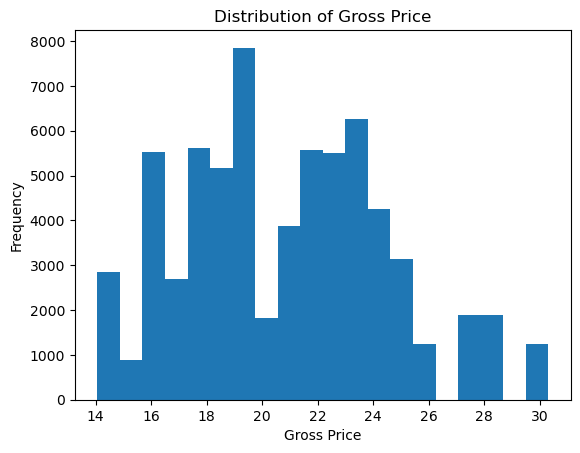

In [34]:
# Histogram for revenue
plt.hist(merged_data['gross_price'], bins=20)
plt.xlabel('Gross Price')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Price')
plt.show()

The histogram illustrates that the majority of item prices fall between 14 USD and 30 USD, with the range between 18 USD to 20 USD having the highest frequency.

### Time-Series Analysis:

In [35]:
# Convert date column to datetime object
merged_data['date_of_transaction'] = merged_data['date'].astype('datetime64[Y]')
# Calculate revenue as the product of gross_price and sold_quantity
merged_data['revenue'] = merged_data['gross_price'] * merged_data['sold_quantity']

# Group by year and calculate mean revenue
revenue_by_year = merged_data.groupby(merged_data['date_of_transaction'].dt.year)['revenue'].mean() 

display(revenue_by_year.values)

array([ 503.02277503,  479.28812633,  649.06710644,  850.93398494,
       2750.33870885])

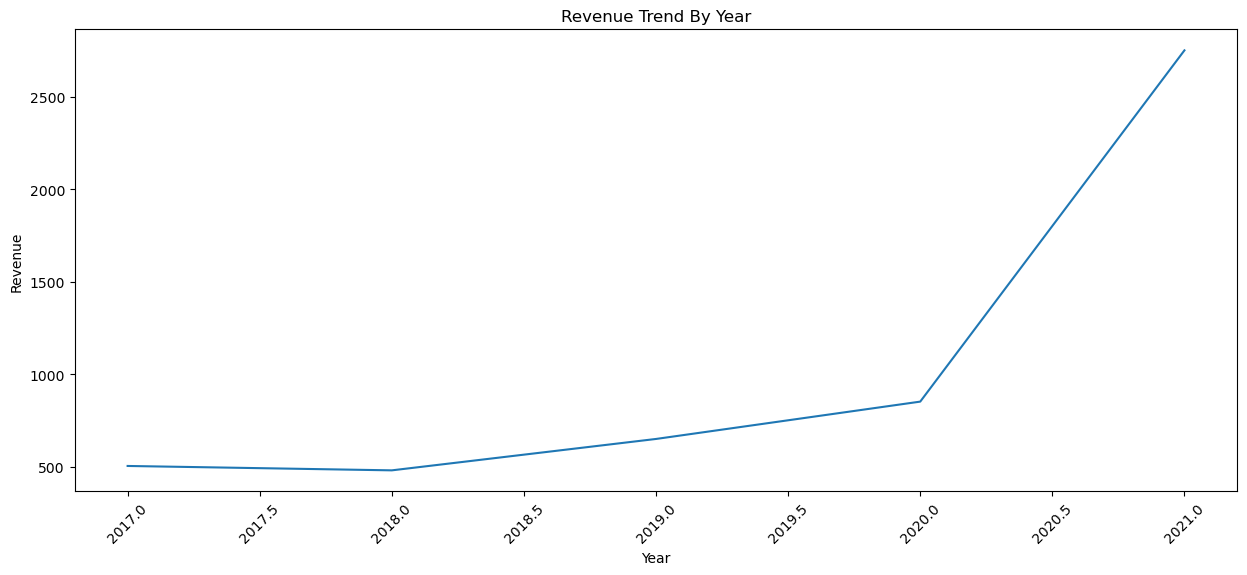

In [36]:
#plot reve
# Set the figure size
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed

# Create the line plot
plt.plot(revenue_by_year.index, revenue_by_year.values)
plt.xlabel('Year')
plt.ylabel('Revenue')
plt.title('Revenue Trend By Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()


The revenue trend shows a relatively slow increase from 2017 to 2020, with a sharp increase in revenue from 2020 to 2021.

In [37]:
# Calculate profit and profit margin
# find total cost which represent the cost of total sold_quantity
merged_data['total_cost']=merged_data['manufacturing_cost']*merged_data['sold_quantity']
merged_data['profit'] = (merged_data['revenue']) - (merged_data['total_cost'])
merged_data['profit_margin'] = (merged_data['profit'] / merged_data['revenue']) * 100
display(merged_data['profit'].head())

0    549.5862
1    829.7674
2    183.1954
3     64.6572
4     53.8810
Name: profit, dtype: float64

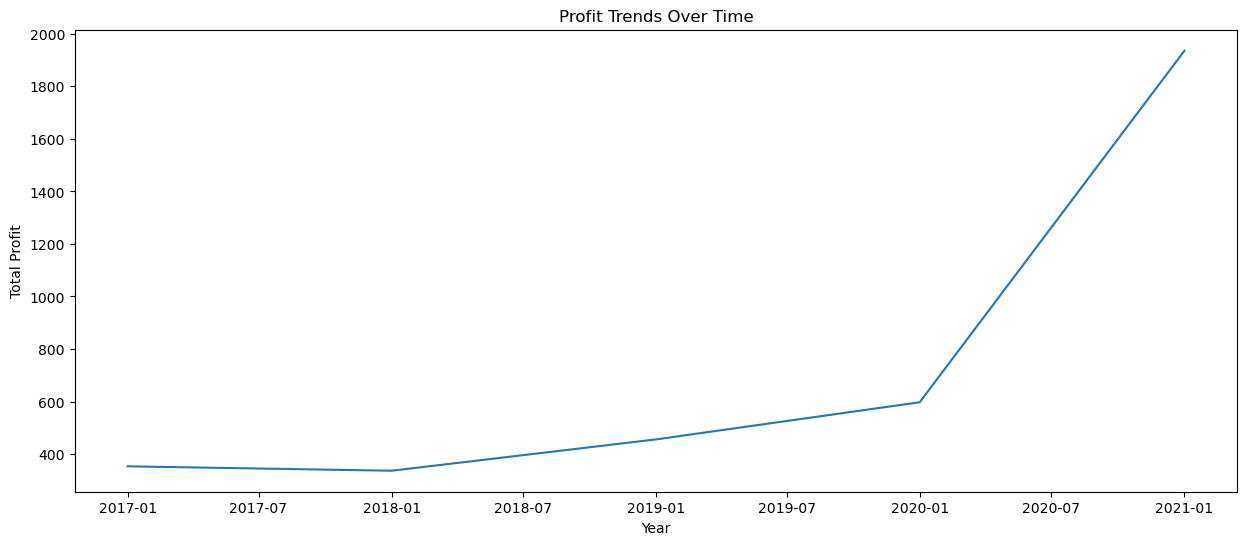

In [38]:
# Line plot to visualize profit trends over time
profit_by_year = merged_data.groupby(merged_data['date_of_transaction'])['profit'].mean()
# Set the figure size
plt.figure(figsize=(15, 6))  # Adjust the width and height as needed
plt.plot(profit_by_year.index, profit_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.title('Profit Trends Over Time')
plt.show()

The profit trend over time shows a slow increase from 400 to 600 between January 2017 and January 2020, similar to the revenue trend. From January 2020 to January 2021, the profit trend shows a sharp increase in profit between 2020-01 to 2021-01.

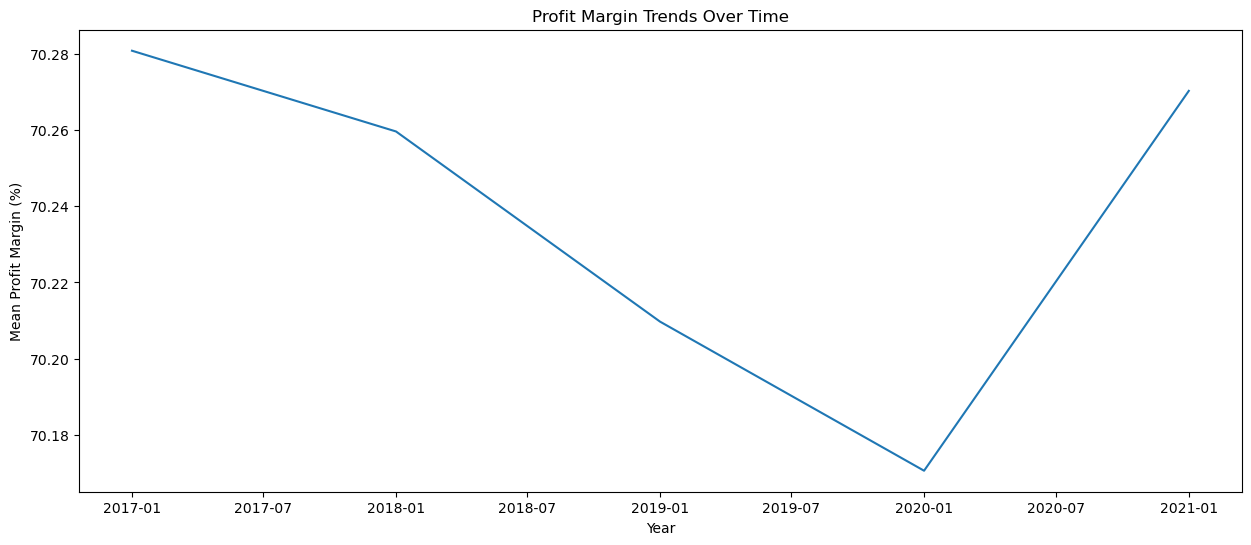

In [39]:
# Example: Line plot to visualize profit margin trends over time
profit_margin_by_year = merged_data.groupby(merged_data['date_of_transaction'])['profit_margin'].mean()
plt.figure(figsize=(15, 6))
plt.plot(profit_margin_by_year.index, profit_margin_by_year.values)
plt.xlabel('Year')
plt.ylabel('Mean Profit Margin (%)')
plt.title('Profit Margin Trends Over Time')
plt.show()

The profit margin decreased gradually from 70.28% to 70.18% between January 2017 and January 2020. However, the profit margin showed a sharp increase from January 2020 to January 2021.

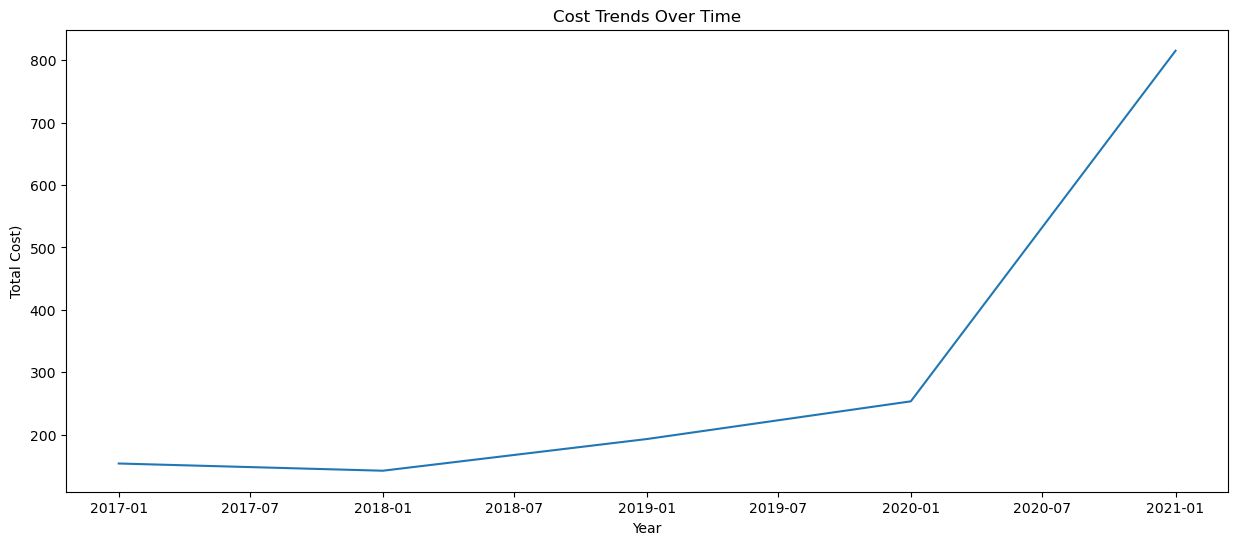

In [68]:
# Example: Line plot to visualize cost trends over time
cost_by_year = merged_data.groupby(merged_data['date_of_transaction'])['total_cost'].mean()
plt.figure(figsize=(15, 6))
plt.plot(cost_by_year.index, cost_by_year.values)
plt.xlabel('Year')
plt.ylabel('Total Cost)')
plt.title('Cost Trends Over Time')
plt.show()

Based on the results from the graphs, it appears that the cost rises over time, leading to a fall in profit margin.

## Hypothesis Testing:

### H1:There is a positive correlation between marketing expenditures and revenue

Null Hypothesis (H0):
The null hypothesis states that there is no statistically significant correlation between manufacturing cost and gross revenue. In other words, the correlation coefficient is equal to zero (ρ = 0).

Alternative Hypothesis(H1):The alternative hypothesis states that there is no statistically significant correlation between manufacturing cost and gross revenue. 



In [41]:
# Calculate the correlation coefficient 
# Calculate the correlation coefficient between manufacturing_cost and gross_price
correlation_coefficient, _ = scipy.stats.pearsonr(merged_data['total_cost'], merged_data['revenue'])
# Define the significance level (alpha)
alpha = 0.05  

# Check if the correlation is statistically significant
if correlation_coefficient> alpha:
    print(f"The correlation ({correlation_coefficient:.2f}) is statistically significant.")
    if correlation_coefficient > 0:
        print("There is a positive correlation between marketing expenditures and revenue.")
    else:
        print("There is a negative correlation between marketing expenditures and revenue.")
else:
    print("The correlation is not statistically significant.")

The correlation (1.00) is statistically significant.
There is a positive correlation between marketing expenditures and revenue.


### H2:Profit margins have improved over the four years due to cost optimization.

Null Hypothesis (H0): There is no significant difference in profit margins between the two time periods. In other words, the profit margins for '2021-01-01' and '2018-01-01' are the same.

Alternative Hypothesis (H1): There is a significant difference in profit margins between the two time periods.

**H1a: If the t-statistic (t_stat) is greater than 0, it suggests that the profit margins have improved in '2021-01-01' compared to '2018-01-01'.

**H1b: If the t-statistic (t_stat) is less than 0, it suggests that the profit margins have declined in '2021-01-01' compared to '2018-01-01'.

In [42]:
# Define the time periods for the A/B test
current_year_data = merged_data[merged_data['fiscal_year'] == '2021-01-01'].copy()
previous_year_data = merged_data[merged_data['fiscal_year'] == '2018-01-01'].copy()

# Calculate profit margins for both time periods
current_year_data['profit_margin'] = (current_year_data['revenue'] - current_year_data['total_cost']) / current_year_data['revenue']
previous_year_data['profit_margin'] = (previous_year_data['revenue'] - previous_year_data['total_cost']) / previous_year_data['revenue']

# Assuming alpha level (significance level) of 0.05
alpha = 0.05

# Perform a two-sample t-test to compare profit margins
t_stat, p_value = stats.ttest_ind(current_year_data['profit_margin'], previous_year_data['profit_margin'], equal_var=False)

# Check if the p-value is less than alpha (significant)
if p_value < alpha:
    print("The difference in profit margins is statistically significant.")
    if t_stat > 0:
        print("Profit margins have improved over the last 4 years.")
    else:
        print("Profit margins have declined over the last 4 years.")
else:
    print("There is no statistically significant difference in profit margins.")


There is no statistically significant difference in profit margins.


The statistical analysis show that there are no significant change in profit margin for the last 4 years.

### H3:Certain product categories contribute significantly to overall profits

Null Hypothesis (H0): The null hypothesis in this context would be that there is no significant correlation between the 'profit_margin' and any of the other variables being considered (i.e., division, category, segment, etc.). In other words, the variables are independent, and any observed correlations are due to random chance.

Alternative Hypothesis (Ha): The alternative hypothesis would be that there is a significant correlation between 'profit_margin' and at least one of the other variables. This suggests that there is a non-random, meaningful relationship between 'profit_margin' and the other variables being analyzed.

In [43]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67250 entries, 0 to 67249
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   product_code         67250 non-null  object        
 1   fiscal_year          67250 non-null  datetime64[ns]
 2   gross_price          67250 non-null  float64       
 3   cost_year            67250 non-null  datetime64[ns]
 4   manufacturing_cost   67250 non-null  float64       
 5   date                 67250 non-null  object        
 6   customer_code        67250 non-null  float64       
 7   sold_quantity        67250 non-null  float64       
 8   date_of_transaction  67250 non-null  datetime64[ns]
 9   revenue              67250 non-null  float64       
 10  total_cost           67250 non-null  float64       
 11  profit               67250 non-null  float64       
 12  profit_margin        67178 non-null  float64       
dtypes: datetime64[ns](3), float64(8

In [44]:
merged_data.isna().sum()

product_code            0
fiscal_year             0
gross_price             0
cost_year               0
manufacturing_cost      0
date                    0
customer_code           0
sold_quantity           0
date_of_transaction     0
revenue                 0
total_cost              0
profit                  0
profit_margin          72
dtype: int64

In [45]:
# Drop missing value in profit_margin column
merged_data.dropna(subset=['profit_margin'], inplace=True)


In [46]:
#combine data with product_code
merged_data = merged_data.merge(products_data,how='inner',left_on=['product_code'],right_on=['product_code'])


In [47]:
#check duplicates
print(merged_data.duplicated().sum()) 

0


In [48]:
# combine with pre_discount_data
merged_data = merged_data.merge(pre_discount_data,how='inner',left_on=['customer_code','fiscal_year'],right_on=['customer_code','fiscal_year'])

In [49]:
#remove missing value from profir_margin
merged_data.dropna(subset=['profit_margin'], inplace=True)

In [50]:
#checking for missing values
merged_data.isna().sum()

product_code                0
fiscal_year                 0
gross_price                 0
cost_year                   0
manufacturing_cost          0
date                        0
customer_code               0
sold_quantity               0
date_of_transaction         0
revenue                     0
total_cost                  0
profit                      0
profit_margin               0
division                    0
segment                     0
category                    0
product                     0
variant                     0
pre_invoice_discount_pct    0
dtype: int64

In [51]:
#checking for duplicates
print(merged_data.duplicated().sum()) 

0


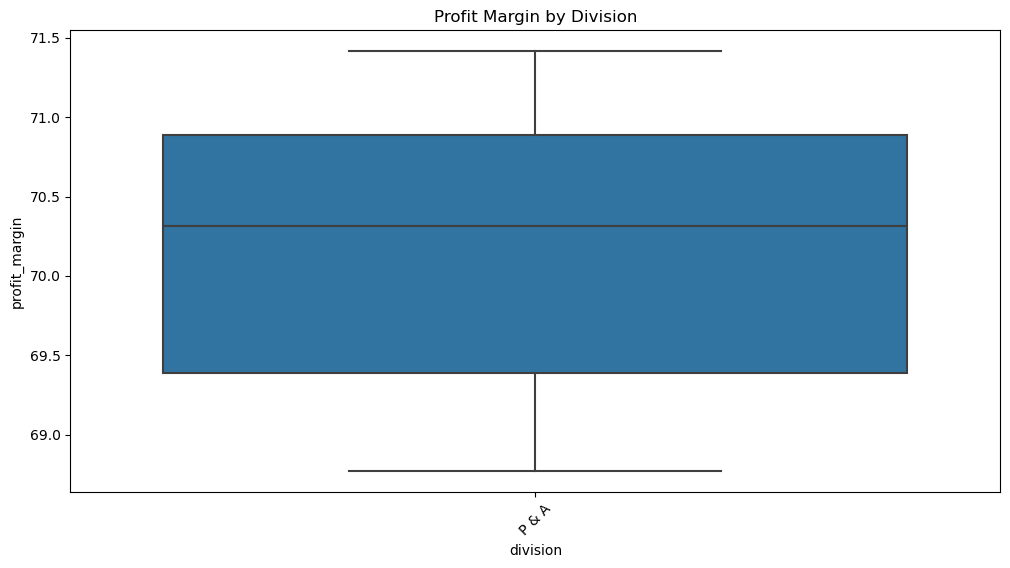

In [52]:
#visualization for profit_margin with division
# Data Visualization
plt.figure(figsize=(12, 6))
sns.boxplot(x='division', y='profit_margin', data=merged_data)
plt.title('Profit Margin by Division')
plt.xticks(rotation=45)
plt.show()

The box plot shows that all the profit margins come from the 'Peripherals and Accessories' division.

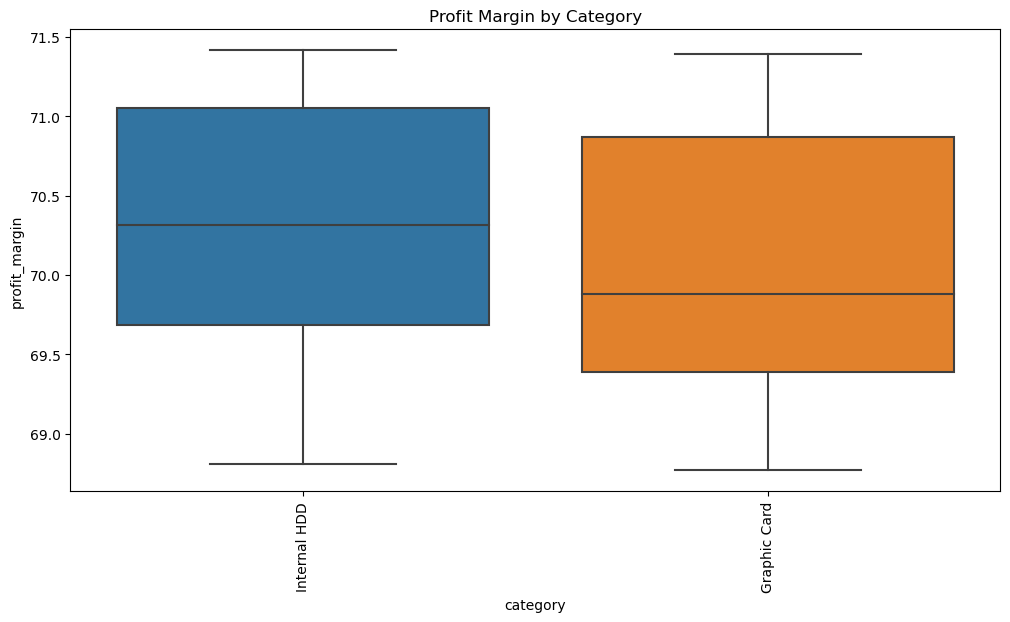

In [53]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='category', y='profit_margin', data=merged_data)
plt.title('Profit Margin by Category')
plt.xticks(rotation=90)
plt.show()

The box plot shows that the majority of profit margins influence from Graphic Card and Internal HDD's category

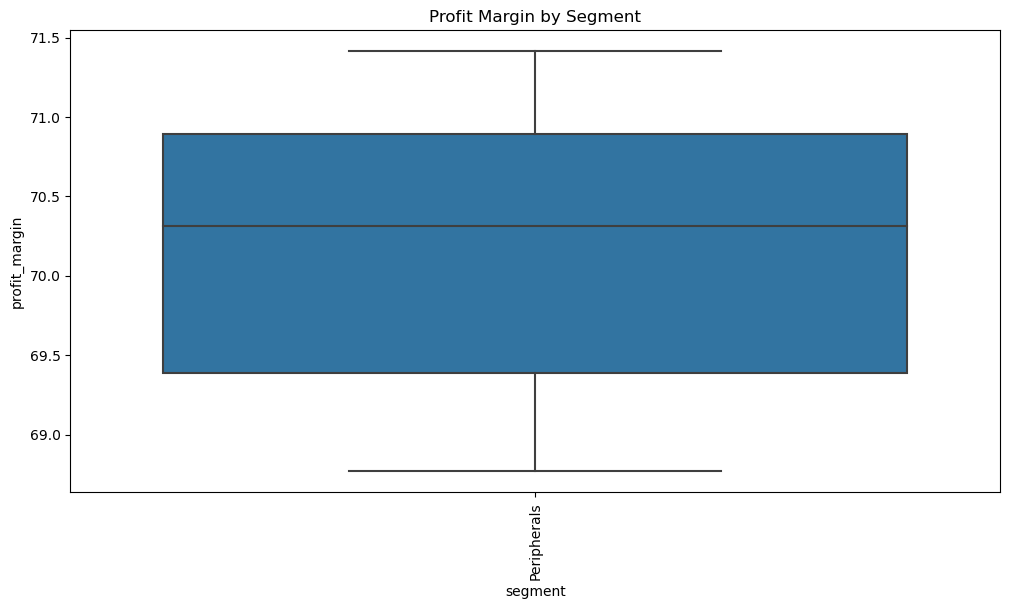

In [54]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='segment', y='profit_margin', data=merged_data)
plt.title('Profit Margin by Segment')
plt.xticks(rotation=90)
plt.show()

The box plot shows that the majority of profit margins are influenced by the Peripherals segment with two categories

In [55]:
# Select relevant columns for analysis
relevant_columns = ['profit_margin', 'division', 'category', 'segment']
data_subset = merged_data[relevant_columns]

# Convert categorical variables to numerical using one-hot encoding
data_subset = pd.get_dummies(data_subset, columns=['division', 'category', 'segment'])
# Calculate the correlation matrix
correlation_matrix = data_subset.corr()
# Extract the correlation of profit margin with other variables
correlation_with_profit_margin = correlation_matrix['profit_margin']

# Sort by absolute correlation values to identify influential factors
correlation_with_profit_margin = correlation_with_profit_margin.abs().sort_values(ascending=False)

# Print the correlation values for analysis
print(correlation_with_profit_margin)


profit_margin            1.000000
category_Graphic Card    0.088958
category_Internal HDD    0.088958
division_P & A                NaN
segment_Peripherals           NaN
Name: profit_margin, dtype: float64


In summary, the result indicates that 'profit_margin' is positively correlated with 'category_Graphic Card' and 'category_Internal HDD', but the correlation is not very strong. 

Having uncovered the categories that impact profit_margin, let dive into the dynamic relationship between pre_invoice_discount_pct and its influence on profit_margin

In [56]:
# Select relevant columns for the regression analysis
relevant_columns = ['profit', 'pre_invoice_discount_pct']

# Create a subset of the data with the selected columns
data_subset = merged_data[relevant_columns]

# Add a constant term to the independent variable (pre_invoice_discount_pct)
data_subset = sm.add_constant(data_subset)

# Define the dependent variable (profit)
y = data_subset['profit']

# Define the independent variable (pre_invoice_discount_pct)
X = data_subset['pre_invoice_discount_pct']

# Fit a linear regression model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())




                                 OLS Regression Results                                
Dep. Variable:                 profit   R-squared (uncentered):                   0.117
Model:                            OLS   Adj. R-squared (uncentered):              0.117
Method:                 Least Squares   F-statistic:                              8866.
Date:                Mon, 16 Oct 2023   Prob (F-statistic):                        0.00
Time:                        18:08:22   Log-Likelihood:                     -6.1913e+05
No. Observations:               67178   AIC:                                  1.238e+06
Df Residuals:                   67177   BIC:                                  1.238e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

The regression analysis suggests that 'pre_invoice_discount_pct' is a statistically significant predictor of 'profit.' However, the R-squared value is quite low (0.117), indicating that this variable explains only a small portion of the variation in 'profit.'



### Customer Segmentation:

In [57]:
#merged the dataframe with customer_data
merged_data = merged_data.merge(customer_data,how='inner',left_on=['customer_code'],right_on=['customer_code'])
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67178 entries, 0 to 67177
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   product_code              67178 non-null  object        
 1   fiscal_year               67178 non-null  datetime64[ns]
 2   gross_price               67178 non-null  float64       
 3   cost_year                 67178 non-null  datetime64[ns]
 4   manufacturing_cost        67178 non-null  float64       
 5   date                      67178 non-null  object        
 6   customer_code             67178 non-null  float64       
 7   sold_quantity             67178 non-null  float64       
 8   date_of_transaction       67178 non-null  datetime64[ns]
 9   revenue                   67178 non-null  float64       
 10  total_cost                67178 non-null  float64       
 11  profit                    67178 non-null  float64       
 12  profit_margin     

In [58]:
merged_data.isna().sum()

product_code                0
fiscal_year                 0
gross_price                 0
cost_year                   0
manufacturing_cost          0
date                        0
customer_code               0
sold_quantity               0
date_of_transaction         0
revenue                     0
total_cost                  0
profit                      0
profit_margin               0
division                    0
segment                     0
category                    0
product                     0
variant                     0
pre_invoice_discount_pct    0
customer                    0
platform                    0
channel                     0
market                      0
sub_zone                    0
region                      0
dtype: int64

#### Identify the top customer that contribute our revenue

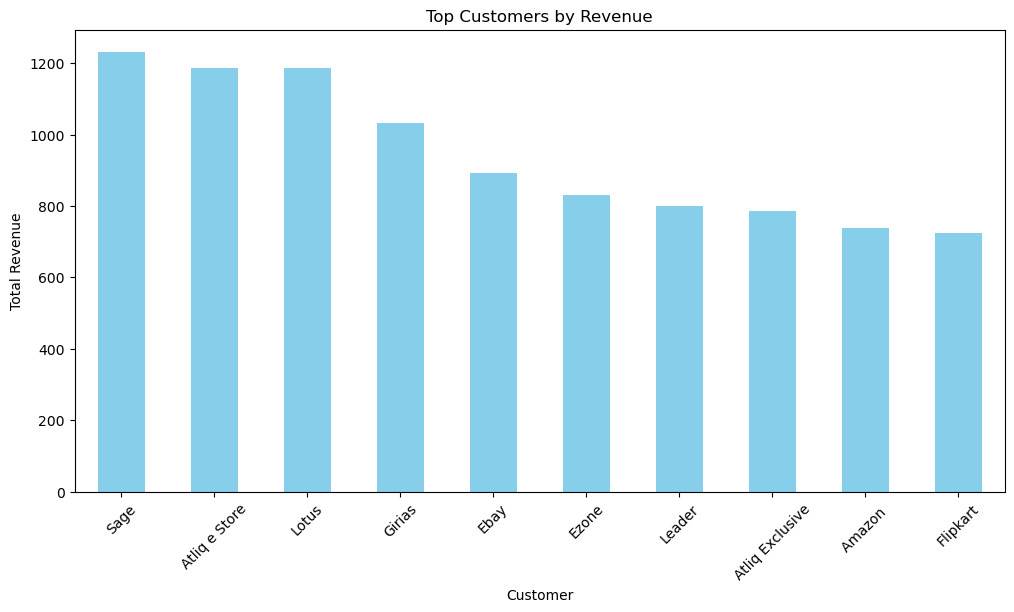

In [59]:
# Drop duplicate rows based on 'customer' column and calculate total revenue
unique_customer_revenue = merged_data.drop_duplicates(subset='customer').groupby('customer')['revenue'].sum()

# Sort unique customers by total revenue in descending order
top_customers = unique_customer_revenue.sort_values(ascending=False)

# Plot the top customers
plt.figure(figsize=(12, 6))
top_customers.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Customers by Revenue')
plt.xlabel('Customer')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



The top three revenue contributors among our customer base are Sage, Atliq e Store, and Lotus.

#### Identify top platform

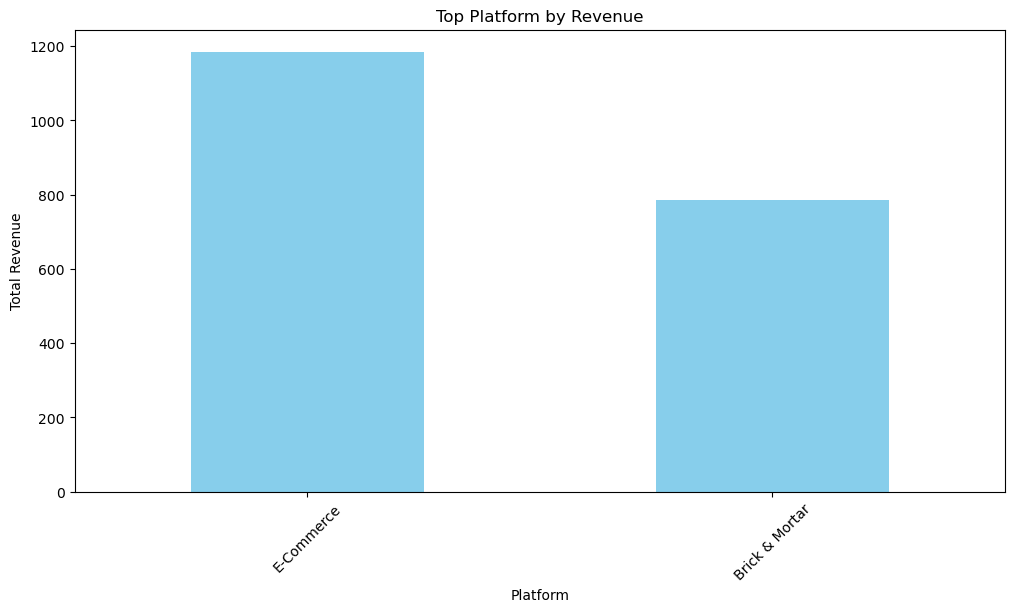

In [60]:
#Drop duplicate based on 'platform' column and calculate total revenue
unique_platform_revenue=merged_data.drop_duplicates(subset='platform').groupby('platform')['revenue'].sum()
#sort unique platform by revenue
top_platform=unique_platform_revenue.sort_values(ascending=False)
#plot the top platform
# Plot the top customers
plt.figure(figsize=(12, 6))
top_platform.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Platform by Revenue')
plt.xlabel('Platform')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Based on the graph, it is evident that most customers now prefer to purchase products through an E-Commerce platform rather than a physical brick-and-mortar store. This trend is likely due to the convenience and accessibility offered by online shopping, making it a more appealing option for consumers.

#### Identify top channel

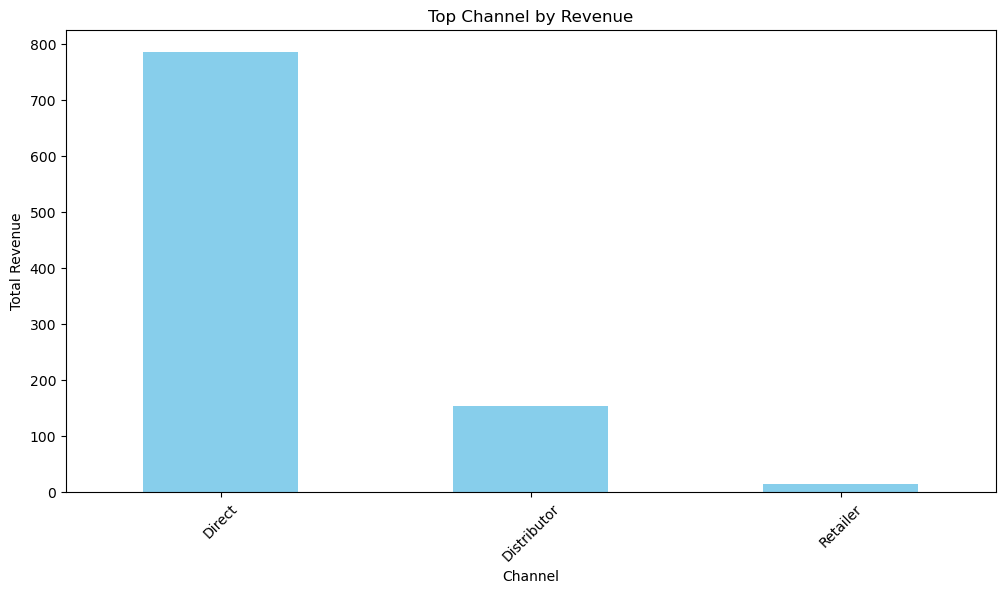

In [61]:
#Drop duplicate based on 'platform' column and calculate total revenue
unique_channel_revenue=merged_data.drop_duplicates(subset='channel').groupby('channel')['revenue'].sum()
#sort unique platform by revenue
top_platform=unique_channel_revenue.sort_values(ascending=False)
#plot the top platform
# Plot the top customers
plt.figure(figsize=(12, 6))
top_platform.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Channel by Revenue')
plt.xlabel('Channel')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

Among the three channels, the Direct channel generates the highest revenue, indicating that most customers prefer receiving goods directly from the store, thereby reducing costs associated with intermediaries.

#### Identify top market

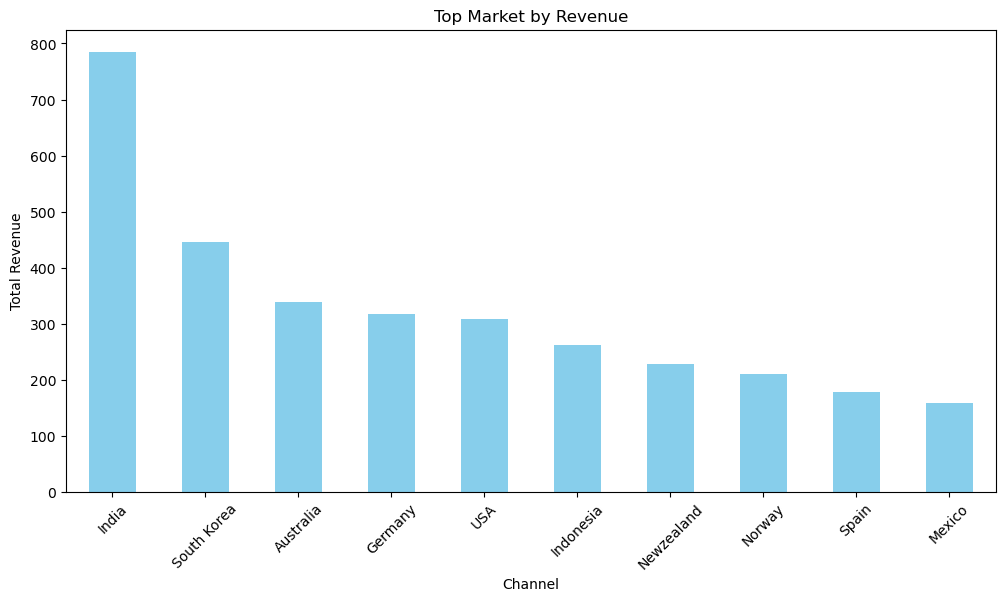

In [62]:
#Drop duplicate based on 'market' column and calculate total revenue
unique_market_revenue=merged_data.drop_duplicates(subset='market').groupby('market')['revenue'].sum()
#sort unique platform by revenue
top_market=unique_market_revenue.sort_values(ascending=False)
#plot the top platform
# Plot the top customers
plt.figure(figsize=(12, 6))
top_market.head(10).plot(kind='bar', color='skyblue')
plt.title('Top Market by Revenue')
plt.xlabel('Channel')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

We've identified that India is our top revenue-contributing market, signaling the importance of maintaining our investments and assets in the Indian market. In contrast, Spain is our lowest-performing market, prompting us to explore strategies for improvement in this region

### Cohort Analysis

In [63]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67178 entries, 0 to 67177
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   product_code              67178 non-null  object        
 1   fiscal_year               67178 non-null  datetime64[ns]
 2   gross_price               67178 non-null  float64       
 3   cost_year                 67178 non-null  datetime64[ns]
 4   manufacturing_cost        67178 non-null  float64       
 5   date                      67178 non-null  object        
 6   customer_code             67178 non-null  float64       
 7   sold_quantity             67178 non-null  float64       
 8   date_of_transaction       67178 non-null  datetime64[ns]
 9   revenue                   67178 non-null  float64       
 10  total_cost                67178 non-null  float64       
 11  profit                    67178 non-null  float64       
 12  profit_margin     

We use cohort analysis to provide valuable insights by analyzing customer behavior over time within different segments based on market, sub-zone, and region.

In [64]:
# Extract the necessary columns
cohort_data = merged_data[['customer_code', 'date_of_transaction', 'market', 'sub_zone', 'region', 'profit']]
# Copy the DataFrame to avoid SettingWithCopyWarning
cohort_data = cohort_data.copy()

# Calculate the first purchase date for each customer
cohort_data['first_purchase_date'] = cohort_data.groupby('customer_code')['date_of_transaction'].transform('min')

# Calculate the cohort period
cohort_data['cohort_period'] = ((cohort_data['date_of_transaction'] - cohort_data['first_purchase_date']).dt.days // 30) + 1

# Group customers into cohorts based on market, sub_zone, and region
cohorts = cohort_data.groupby(['market', 'sub_zone', 'region', 'cohort_period'])

# Calculate various cohort metrics (e.g., customer count, total profit)
cohort_metrics = cohorts.agg({
    'customer_code': 'nunique',
    'profit': 'sum'
}).reset_index()

# Pivot the data for visualization
pivot_cohort = cohort_metrics.pivot_table(index=['market', 'sub_zone', 'region'], columns='cohort_period', values='customer_code')
display(pivot_cohort)

,,cohort_period,1,13,25,37,49
market,sub_zone,region,,,,,
Australia,ANZ,APAC,7.0,7.0,7.0,7.0,7.0
Austria,NE,EU,8.0,8.0,8.0,NaN,NaN
Bangladesh,ROA,APAC,5.0,5.0,5.0,5.0,NaN
Brazil,LATAM,LATAM,2.0,2.0,2.0,2.0,2.0
Canada,NA,NA,11.0,11.0,11.0,11.0,11.0
Chile,LATAM,LATAM,2.0,2.0,2.0,NaN,NaN
China,ROA,APAC,3.0,3.0,3.0,3.0,3.0
Columbia,LATAM,LATAM,1.0,1.0,1.0,NaN,NaN
France,SE,EU,10.0,10.0,10.0,10.0,10.0


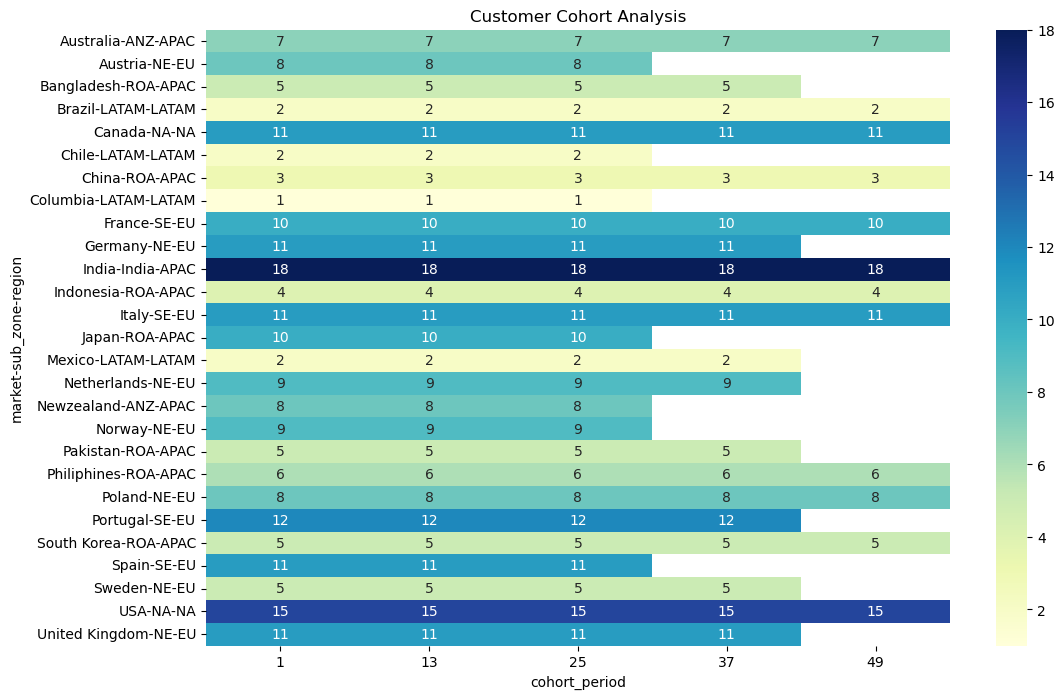

In [65]:
# Set the figure size
# Step 7: Create a heatmap for visualization
plt.figure(figsize=(12, 8))
plt.title('Customer Cohort Analysis')
sns.heatmap(pivot_cohort, annot=True, fmt='g', cmap='YlGnBu')
plt.show()

For segments like "Australia - ANZ - APAC" and "Canada - NA - NA," the average profit remains relatively stable over the cohort periods. This suggests that customers from these segments continue to generate a consistent level of profit over time.

Some segments, like "Austria - NE - EU" and "Japan - ROA - APAC," show a decline in profit. This could indicate a decrease in customer profitability over time within these segments.

## Data Visualization

Prepare data before turning it csv in order to make the dataset smaller.

In [66]:
#Export data into csv file
merged_data.to_csv('output_file.csv', index=False)


Link to the Dashboard:https://public.tableau.com/views/FinalProject_16975079732720/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link


## Conclusion

Our project findings encompass several key insights. The histogram shows that item prices primarily range from 14 USD to 30 USD, with a peak between 18 USD and 20 USD.
Based on:
The distribution of gross price:

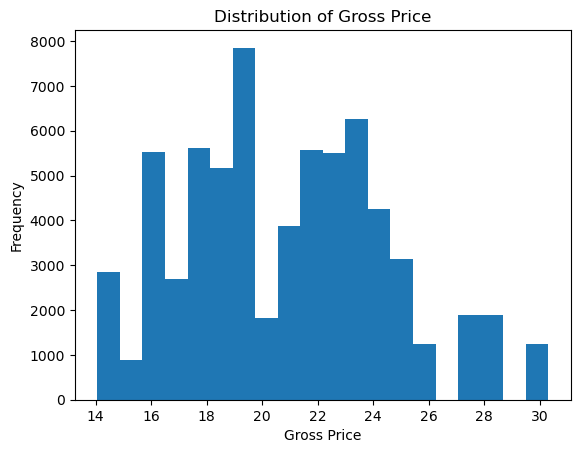

Regarding revenue and profit trends, we observed a steady rise until 2020, followed by a substantial increase in 2021. However, profit margins show a steady decline and a substantialy increase in 2020.
Based on :

Revenue Trend from 2017 to 2021
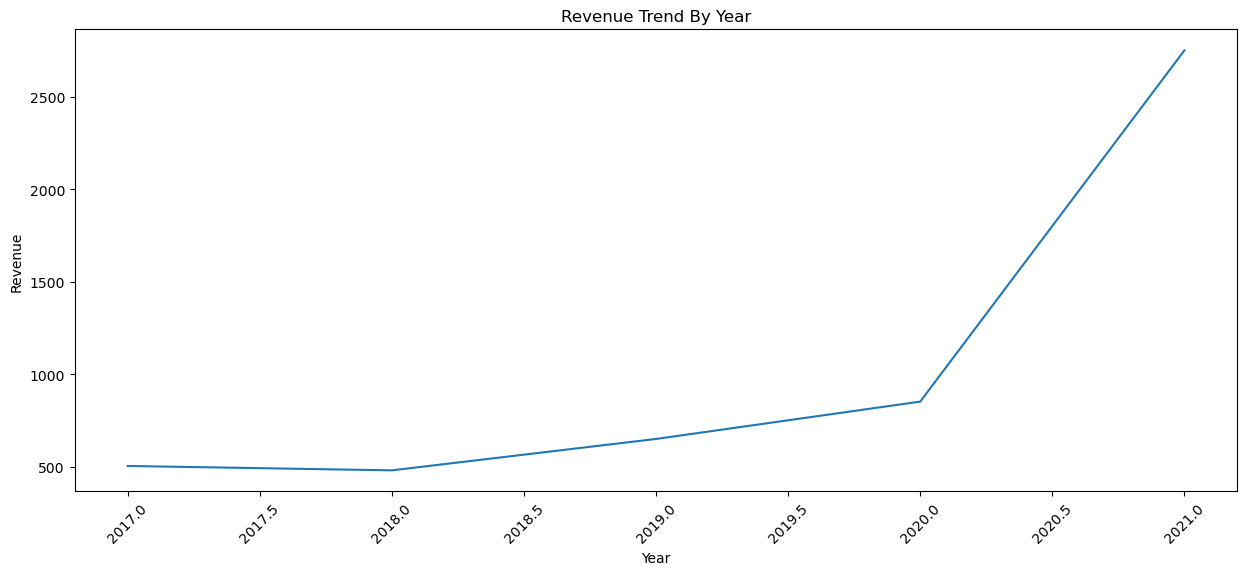

Profit Trend from 2017 to 2021
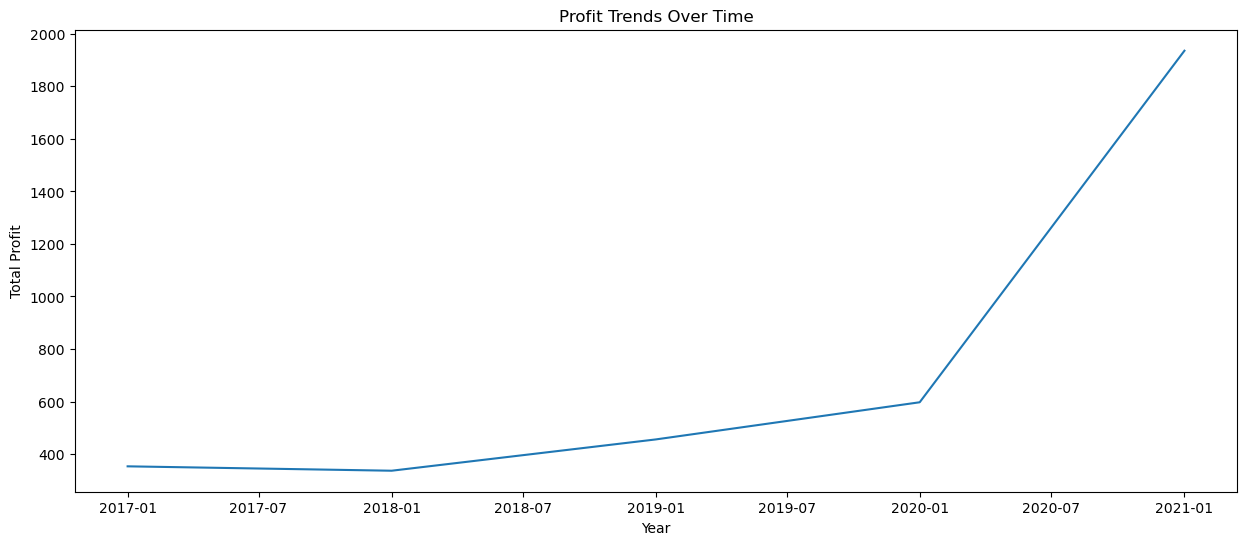

Progit Margin from 2017 to 2021
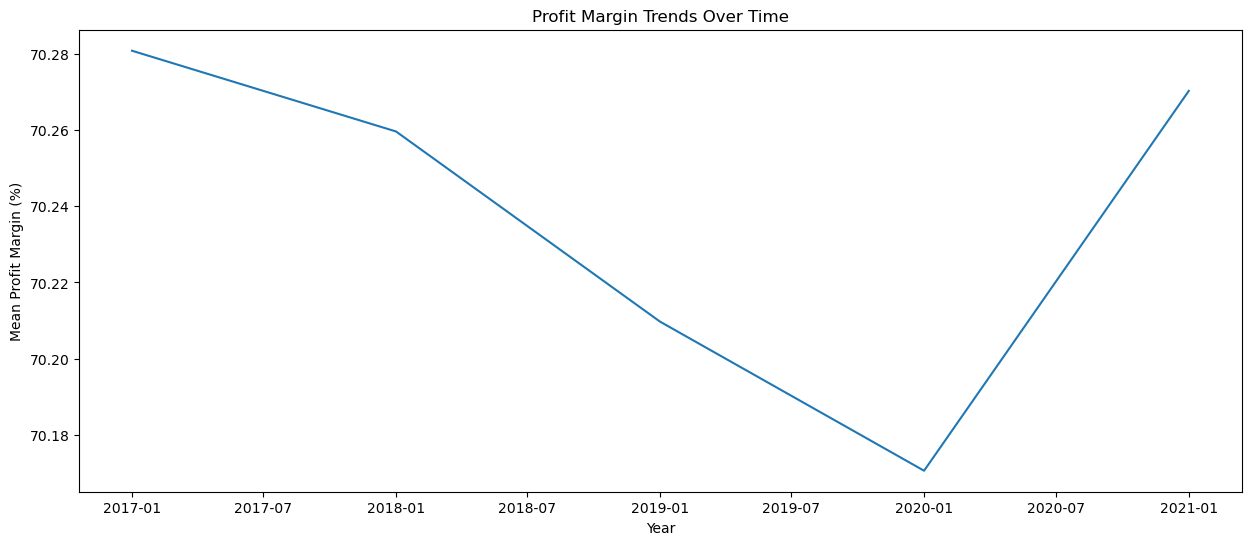


Our hypotheses revealed a significant positive correlation between marketing expenditures and revenue. Product category analysis demonstrated that 'profit_margin' is positively associated with 'category_Graphic Card' and 'category_Internal HDD.'

The influence of 'pre_invoice_discount_pct' on 'profit_margin' is statistically significant but explains a small portion of profit variation.

In customer behavior, our top revenue contributors are Sage, Atliq e Store, and Lotus. E-commerce preferences have surged, with the Direct channel leading in revenue.

Top Customer by Revenue
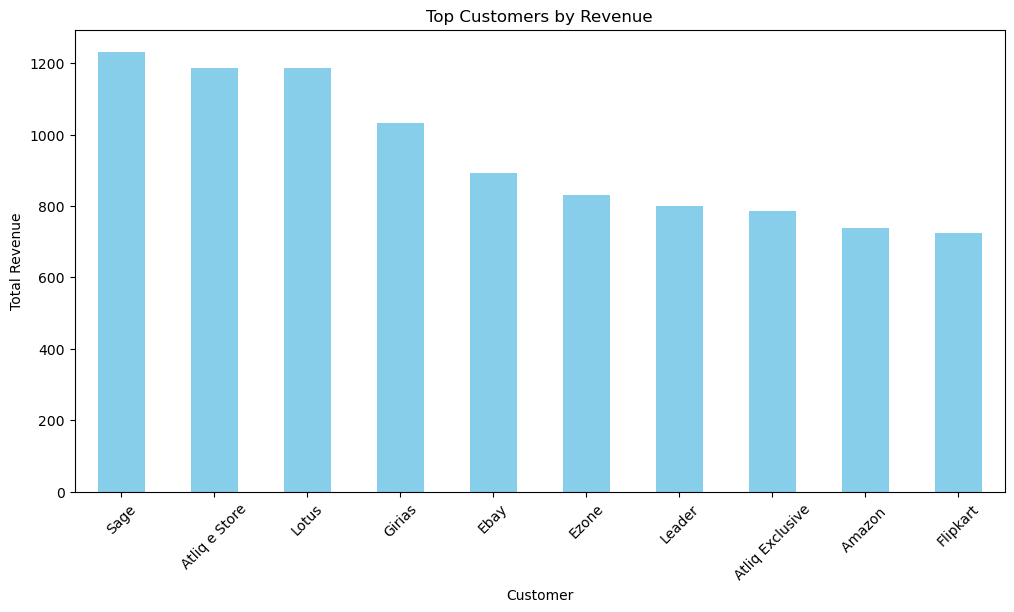

India is our top-performing market, while Spain needs strategic improvement.

Top Market by Revenue
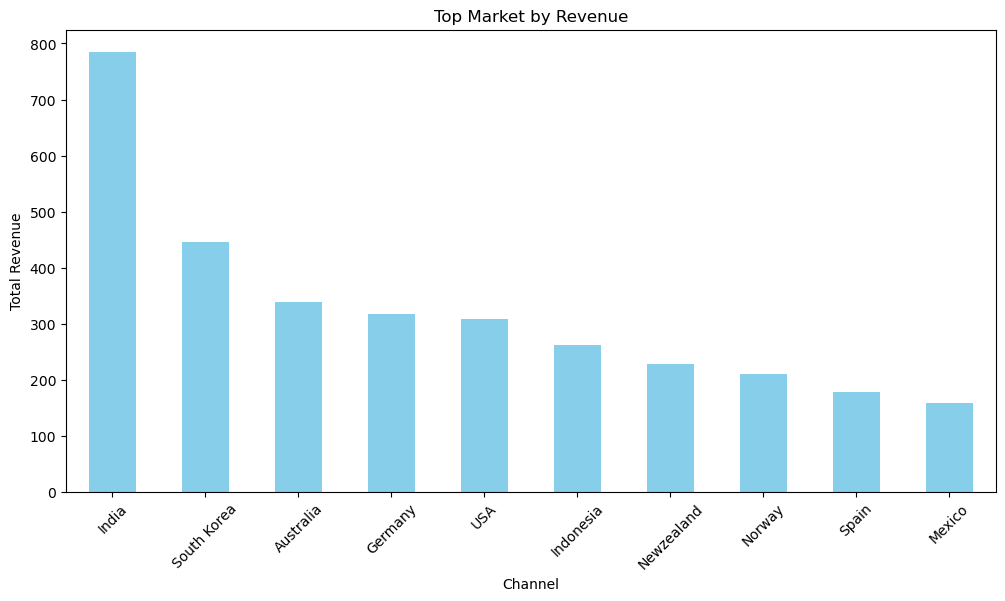

Cohort analysis highlighted stable profits in some segments but declining profitability in others, aiding data-driven decision-making.

Customer Cohort Analysis within different segments based on market, sub-zone, and region.
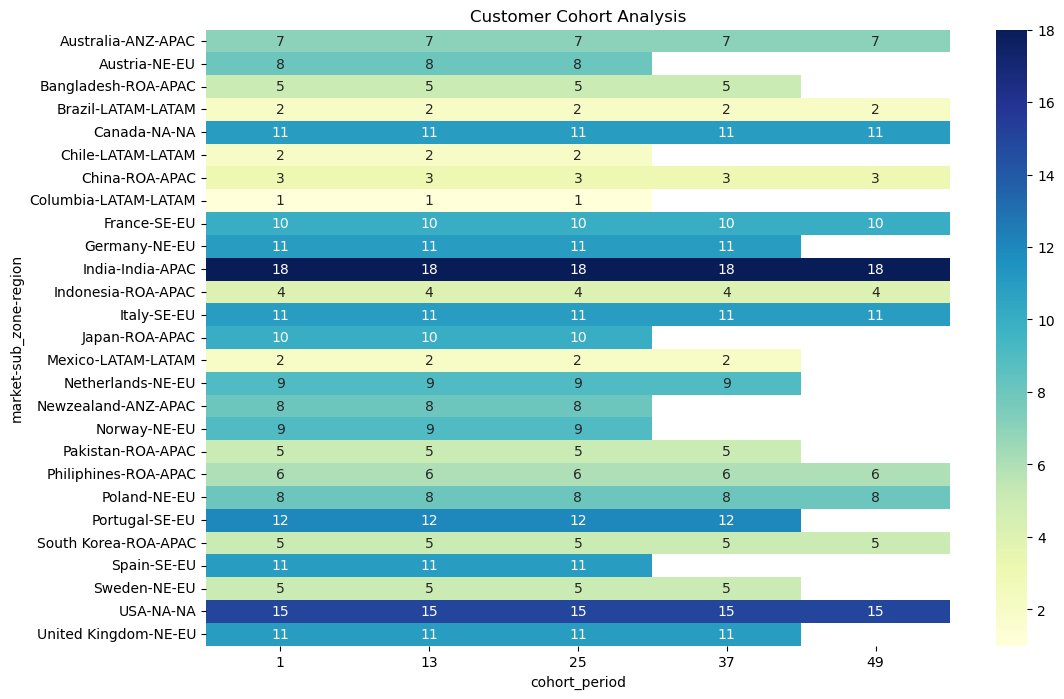

Link to the presentation:https://docs.google.com/presentation/d/1QJ6TrbYw6S1sceuo3ZNrdlmz3JqwrGjqMjab-n_M1JE/edit?usp=sharing